In [37]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [38]:
fit_stars_path = '/Users/mschmitz/jbonnin/Data/CFIS_PSF/CCD-38_dataset/train-star_selection-0000000-38.fits'
test_stars_path = '/Users/mschmitz/jbonnin/Data/CFIS_PSF/CCD-38_dataset/test-star_selection-0000000-38.fits'
PSFs_path = '/Users/mschmitz/jbonnin/Data/rca_runs/w3/shapepipe_run_2019-12-11_11-29-19/rca_runner/output/test_psf-0000000-38.npy'
model_path = '/Users/mschmitz/jbonnin/Data/rca_runs/w3/shapepipe_run_2019-12-10_17-56-15/rca_runner/output/fitted_model-0000000-38.npy'

fit_starcat = fits.open(fit_stars_path)

test_starcat = fits.open(test_stars_path)
test_stars = test_starcat[2].data['VIGNET']

PSFs = np.load(PSFs_path)

model = np.load(model_path, allow_pickle = True)

x_fit = fit_starcat[2].data['XWIN_IMAGE']
y_fit = fit_starcat[2].data['YWIN_IMAGE']

x_test = test_starcat[2].data['XWIN_IMAGE']
y_test = test_starcat[2].data['YWIN_IMAGE']

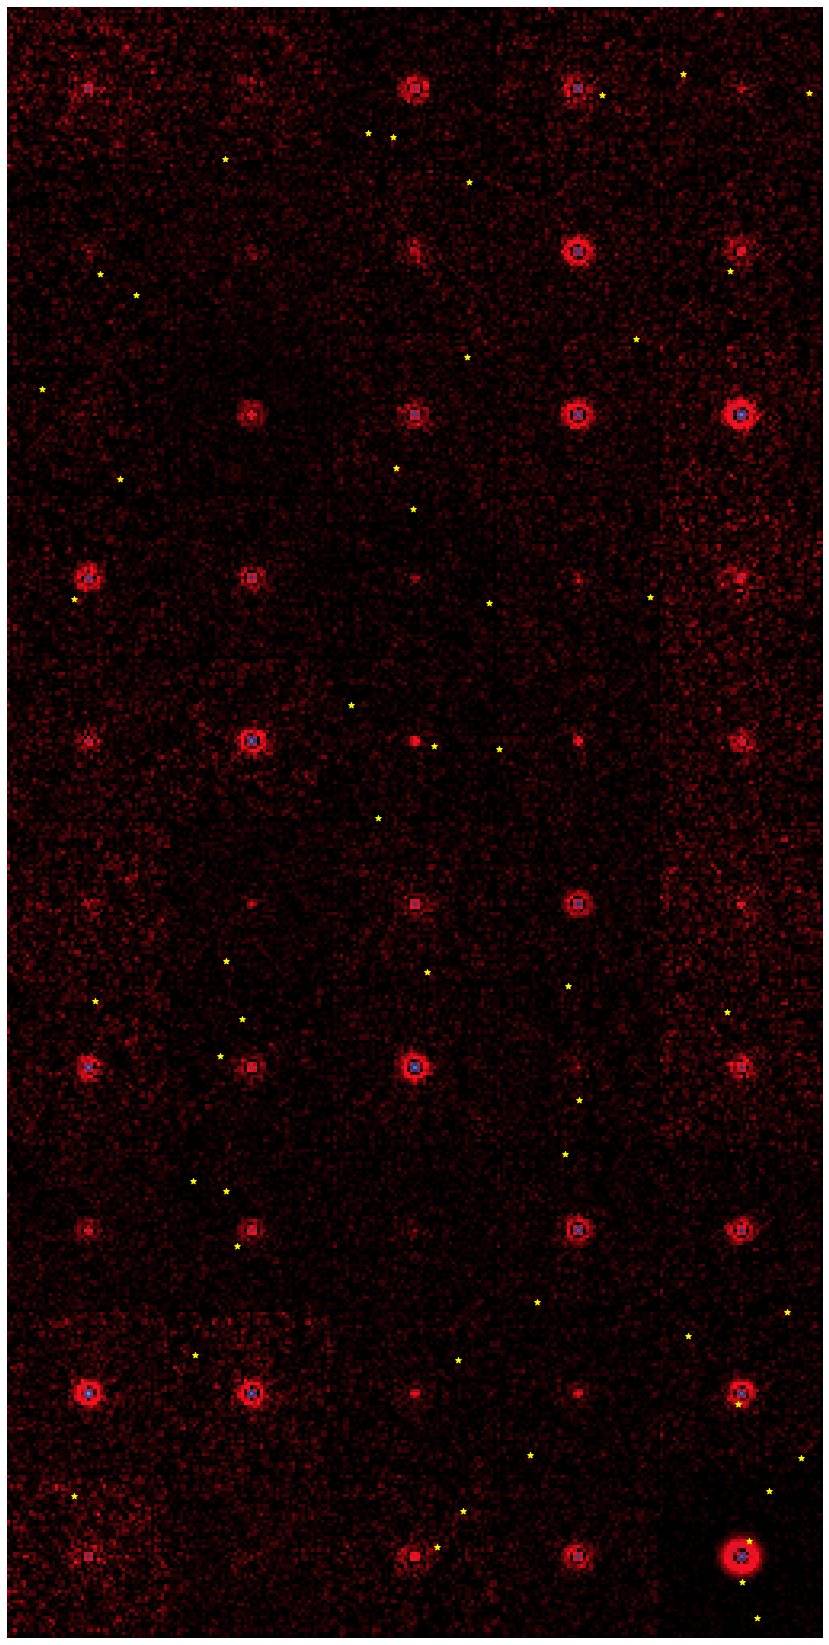

In [39]:
res = np.abs(test_stars - PSFs)
ccd_res = np.zeros((10*res.shape[1], 5*res.shape[2]))

for k in range(50):
    ccd_res[res.shape[1]*(9-k%10):res.shape[1]*(10-k%10),res.shape[2]*(k//10):res.shape[2]*(k//10+1)] = res[k]

plt.figure(figsize = (30,30))
plt.imshow(ccd_res, cmap='gist_stern', vmax=0.06)
plt.axis('off')

plt.scatter(x_fit / 2048 * 255, 509 - y_fit / 4612 * 510, marker = '*', c = 'yellow')

plt.show()

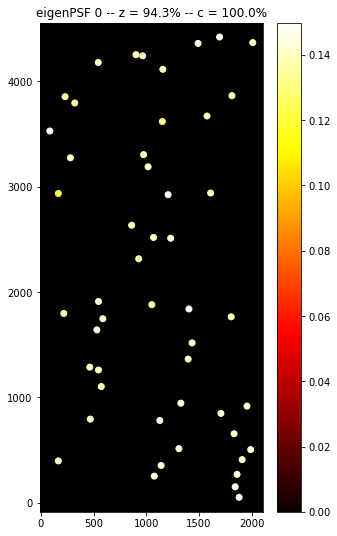

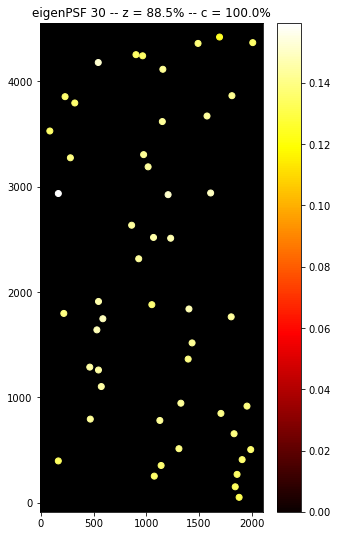

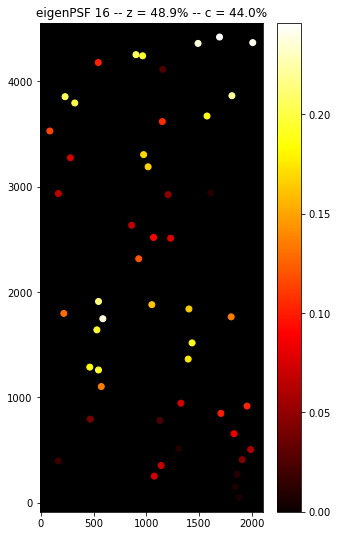

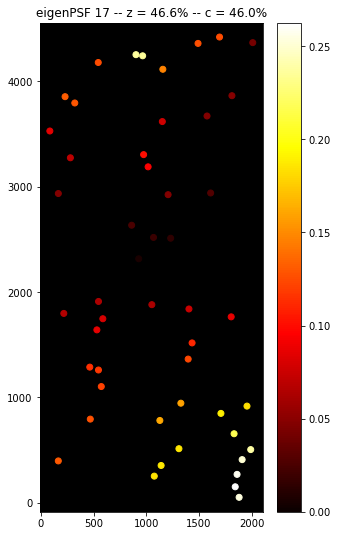

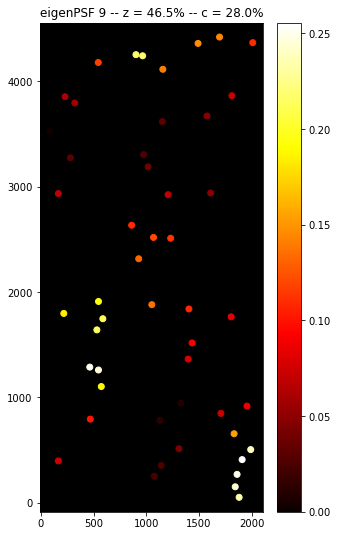

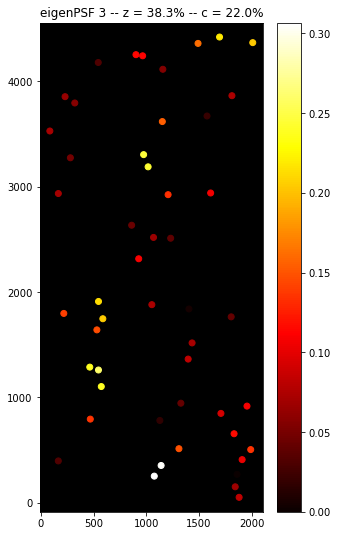

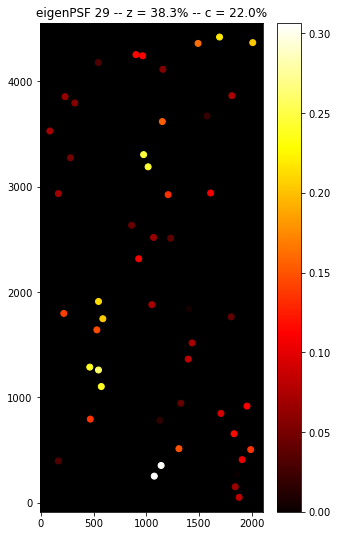

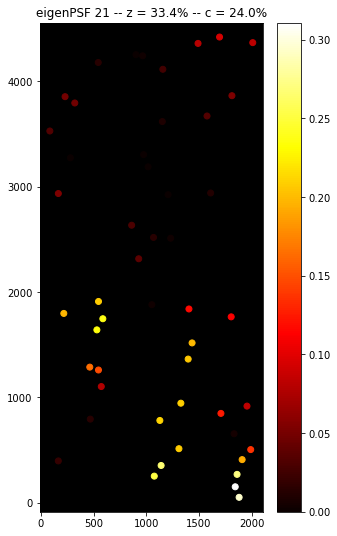

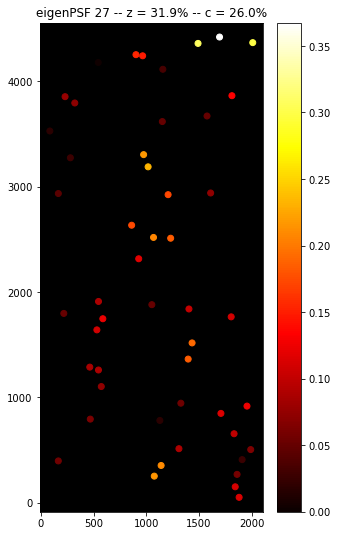

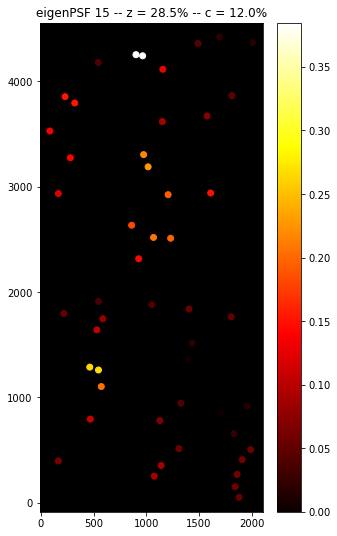

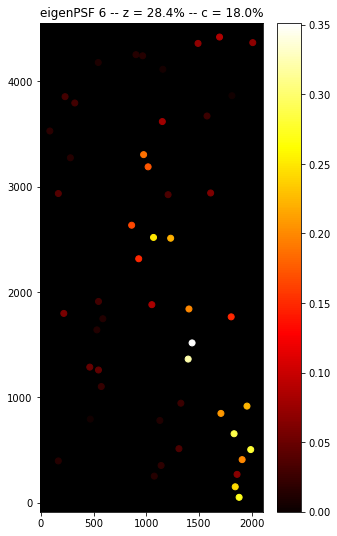

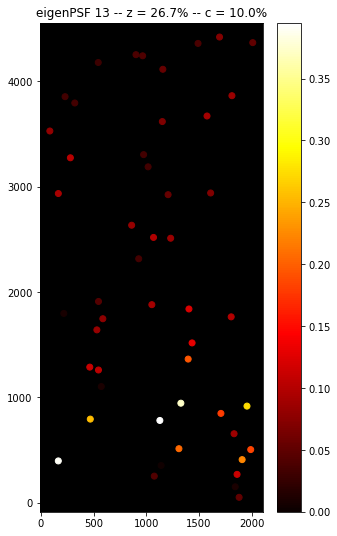

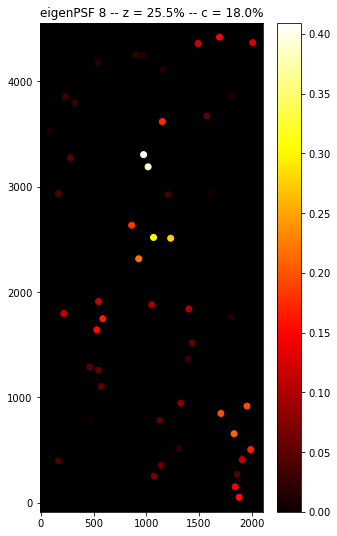

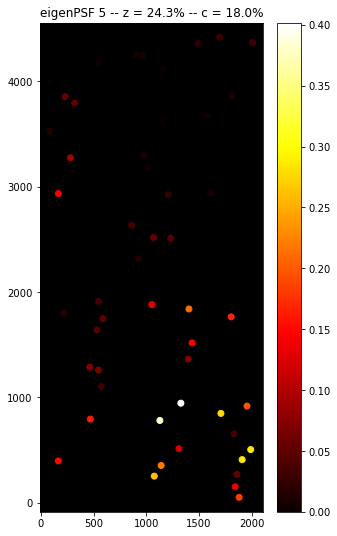

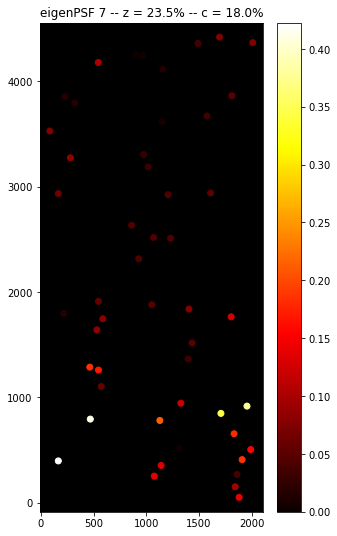

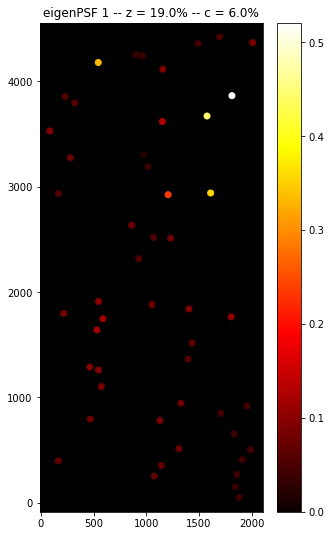

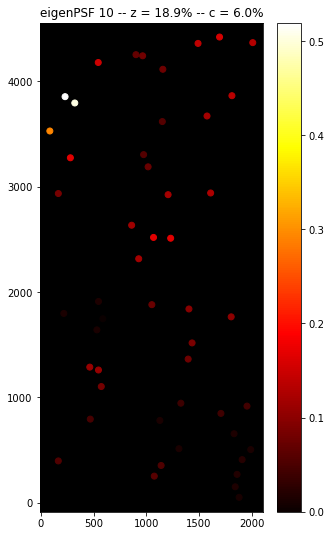

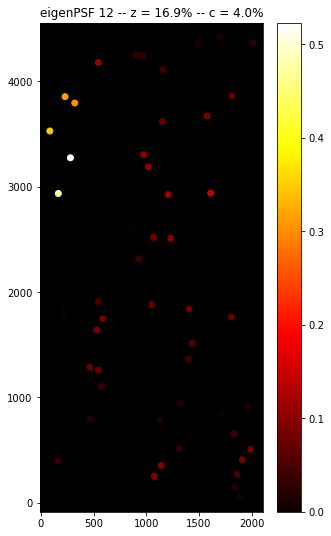

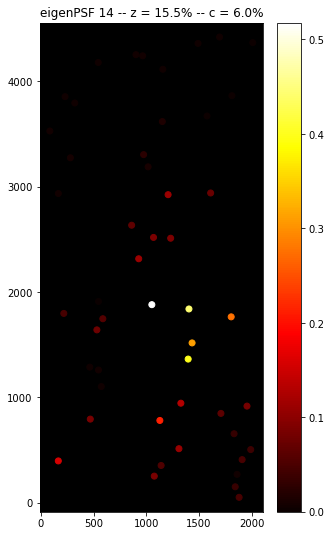

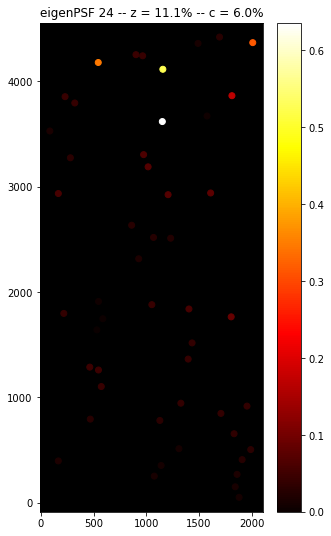

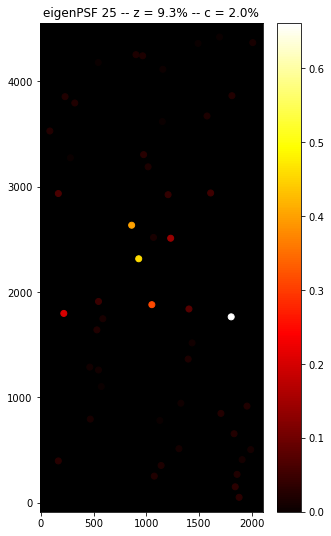

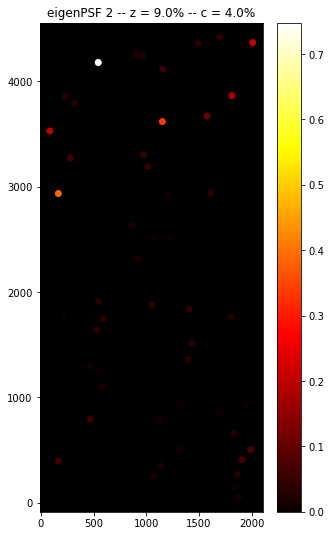

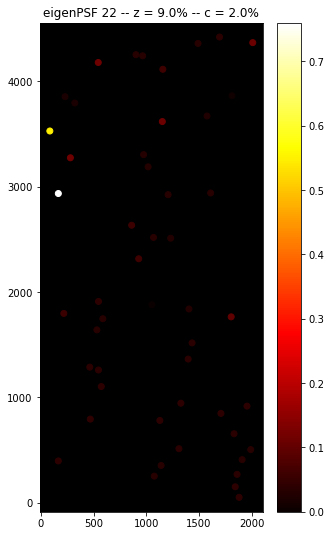

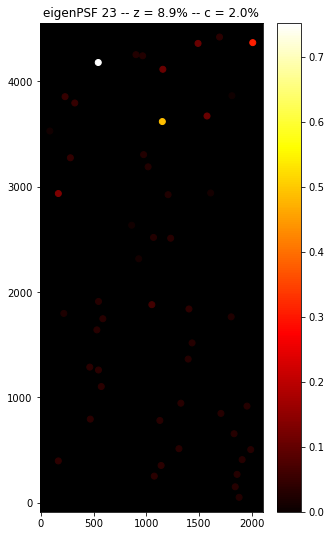

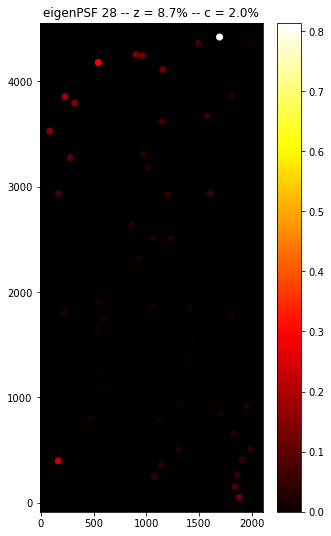

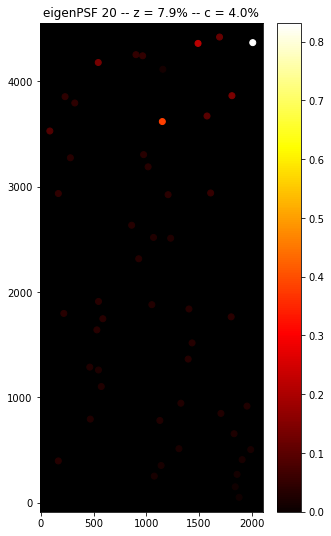

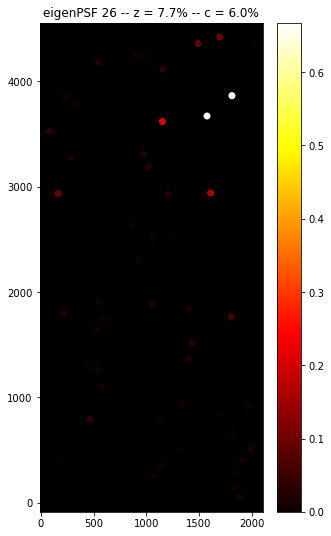

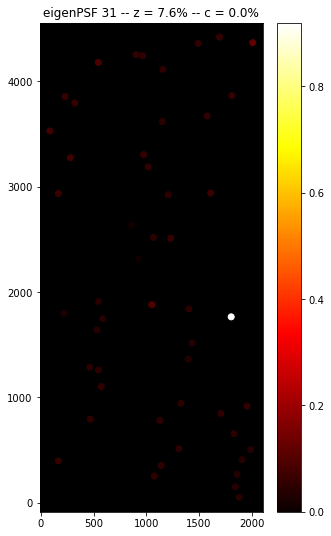

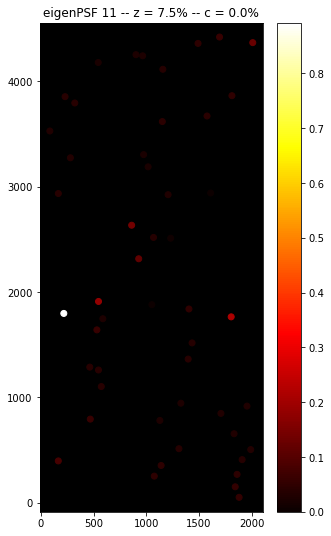

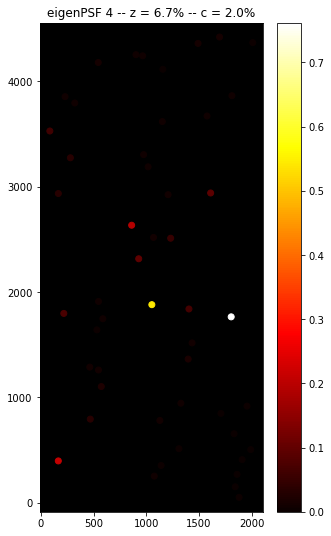

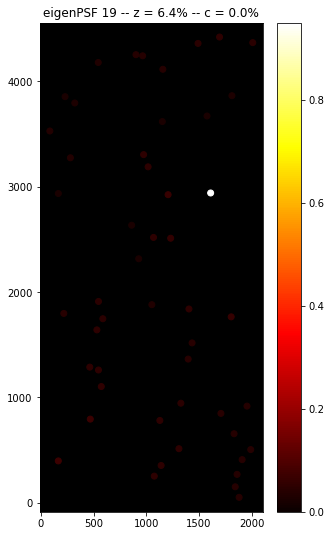

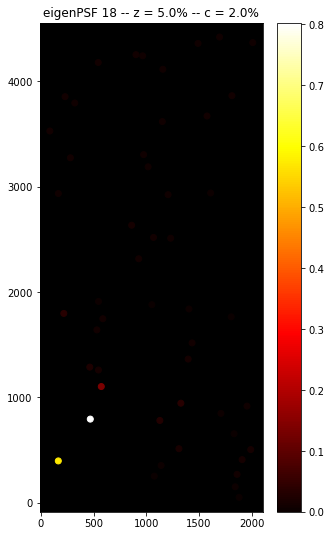

In [140]:
S = model[1]['S']
A = model[1]['A']
for k in range(32):
    a = A[id[k]]
    z = np.sum(np.abs(a)) / np.max(np.abs(a)) / len(a)
    c = len(np.where(a > 0.3 * np.max(np.abs(a)))[0]) / len(a)
    fig = plt.figure(figsize=(5,9))
    ax = fig.gca()
    ax.set_title('eigenPSF {} -- z = {:.1f}% -- c = {:.1f}%'.format(id[k], z * 100, c * 100))
    ax.set_facecolor('black')
    ax.axis('equal')
    im = ax.scatter(x_fit, y_fit, c=np.abs(a), cmap = 'hot', vmin=0)
    plt.colorbar(im, ax = ax)
    plt.show()
    plt.close()

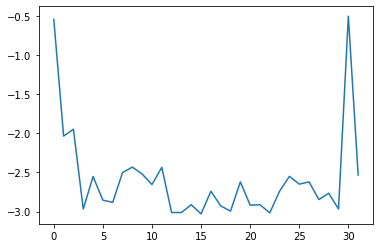

In [85]:
plt.plot(np.log10(np.sum(S ** 2, axis = (0,1))))

In [97]:
idx = np.flip(np.argsort(np.sum(S**2, axis=(0,1))))

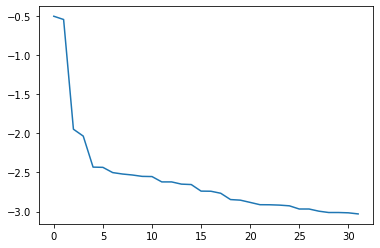

In [98]:
plt.plot(np.log10(np.sum(S ** 2, axis = (0,1)))[idx])

In [126]:
id = np.flip(np.argsort(np.sum(np.abs(A), axis = 1) / np.max(np.abs(A), axis = 1) / A.shape[1]))

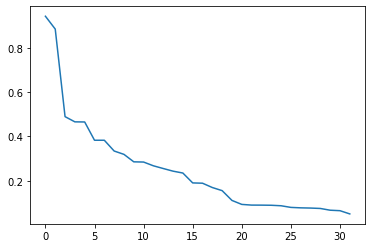

In [139]:
plt.plot(np.array(np.sum(np.abs(A), axis = 1) / np.max(np.abs(A), axis = 1) / A.shape[1])[id])

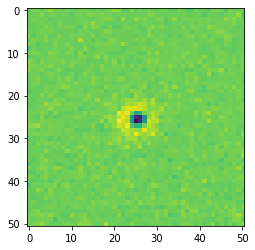

In [134]:
plt.imshow(S[:,:,3])

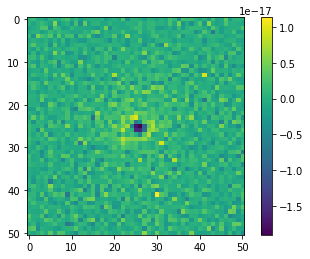

In [137]:
plt.imshow(S[:,:,29]-S[:,:,3])
plt.colorbar()